In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

AFFICHAGE DE MES DONNÉES DE BASES :

In [2]:
customers = pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
products = pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
transactions = pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


Mes produits aux prix négatifs :

In [5]:
products.min()

id_prod    0_0
price     -1.0
categ        0
dtype: object

In [6]:
prod_minus_1 = products[products["price"] == -1]
prod_minus_1

,id_prod,price,categ
731,T_0,-1.0,0


In [7]:
products = products.drop(731)

In [8]:
products.min()

id_prod     0_0
price      0.62
categ         0
dtype: object

Visualisation de mes transactions test:

In [9]:
transactions.max()

id_prod                                   T_0
date          test_2021-03-01 02:30:02.237450
session_id                            s_99998
client_id                                ct_1
dtype: object

In [10]:
test_transac = transactions[transactions["date"].str.startswith("test")]
test_transac

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [11]:
sup_200_test = transactions["date"].str.startswith("test")
transactions = transactions[~sup_200_test]
pOUR_lA_rECENCE = transactions
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


Visualitation de mon produit 0_2245 present dans ma df transactions mais absent dans ma df products :

In [12]:
missing_prod = pd.merge(left=transactions, right=products, on="id_prod", how="left")
display(missing_prod[missing_prod.isnull().any(axis=1)])

,id_prod,date,session_id,client_id,price,categ
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN
...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN


calcul de la moyenne des produits de catégorie 0 pour remplacement de valeurs :

In [13]:
produits_categorie_0 = products[products["categ"] == 0]
moyenne_categorie_0 = produits_categorie_0["price"].mean()
moyenne_categorie_0

11.732794627383015

In [14]:
products.loc[len(products)] = ["0_2245", 11.7, 0]
products[products["id_prod"]== "0_2245"]

,id_prod,price,categ
3286,0_2245,11.7,0


Histograme des ventes par catégorie livres:

In [15]:
prod_trans_inner = pd.merge(left= products, right = transactions)
prod_trans_inner

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0,2021-03-29 13:55:04.422637,s_13112,c_2768
...,...,...,...,...,...,...
336809,0_2245,11.70,0,2021-04-06 19:59:19.462288,s_16936,c_4167
336810,0_2245,11.70,0,2021-03-30 23:29:02.347672,s_13738,c_7790
336811,0_2245,11.70,0,2021-12-03 14:14:40.444177,s_128815,c_6189
336812,0_2245,11.70,0,2021-04-27 18:58:47.703374,s_26624,c_1595


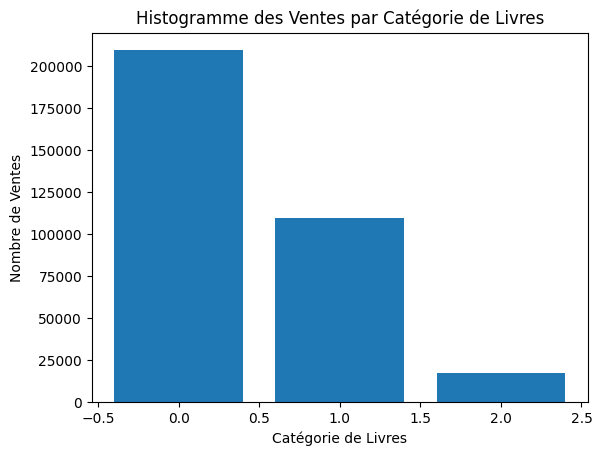

In [16]:
ventes_par_categorie = prod_trans_inner["categ"].value_counts()
plt.bar(ventes_par_categorie.index, ventes_par_categorie.values)
plt.xlabel("Catégorie de Livres")
plt.ylabel("Nombre de Ventes")
plt.title("Histogramme des Ventes par Catégorie de Livres")
plt.show()

Histogramme du nombre d'achats par sex :

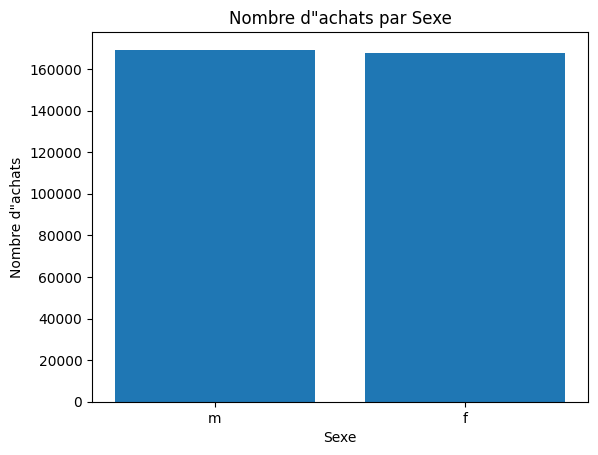

In [17]:
custo_trans_inner = pd.merge(left=customers,right=transactions)
achats_par_sexe = custo_trans_inner["sex"].value_counts()
plt.bar(achats_par_sexe.index, achats_par_sexe.values)
plt.xlabel("Sexe")
plt.ylabel("Nombre d\"achats")
plt.title("Nombre d\"achats par Sexe")
plt.show()

/tmp/ipykernel_284491/2869581467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["date"] = pd.to_datetime(transactions["date"])
/tmp/ipykernel_284491/2869581467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["mois"] = transactions["date"].dt.month.apply(lambda x: calendar.month_name[x])


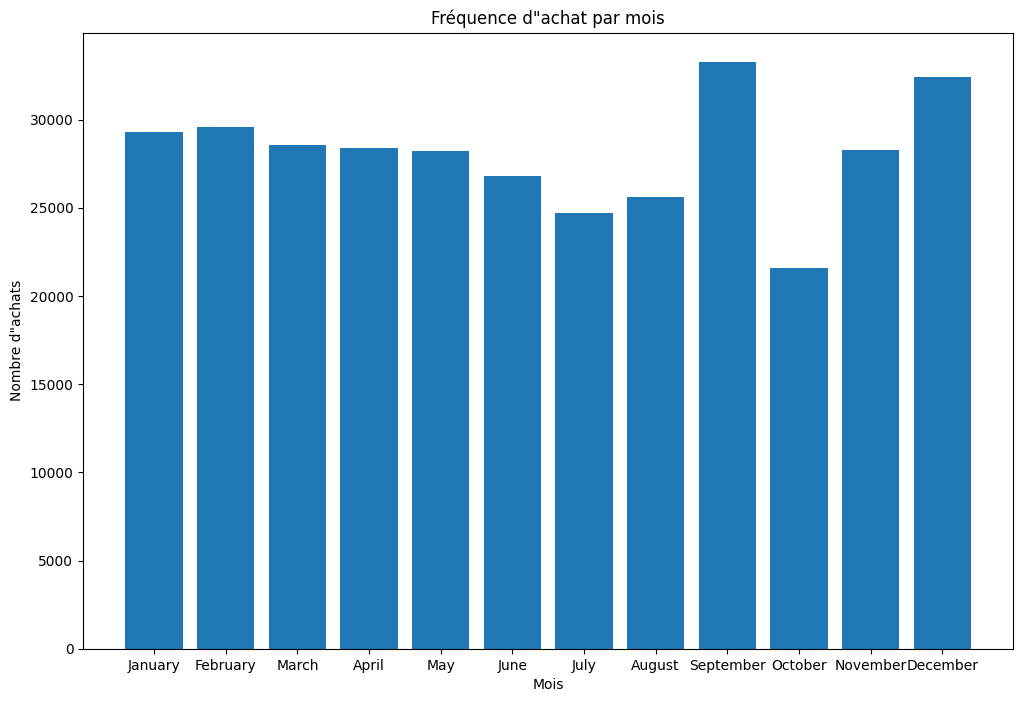

In [18]:
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["mois"] = transactions["date"].dt.month.apply(lambda x: calendar.month_name[x])
achats_par_mois = transactions["mois"].value_counts().sort_index()
achats_par_mois = achats_par_mois.reindex(calendar.month_name[1:], fill_value=0)
plt.figure(figsize=(12, 8))
plt.bar(achats_par_mois.index, achats_par_mois.values)
plt.xlabel("Mois")
plt.ylabel("Nombre d\"achats")
plt.title("Fréquence d\"achat par mois")
plt.show()

Demande du client : Client qui n'ont jamais passé commandes :

In [19]:
cust_trans_out = pd.merge(customers, transactions, on="client_id", how="outer")
clients_sans_achat = cust_trans_out[pd.isnull(cust_trans_out["session_id"])]
clients_sans_achat.to_csv('dataframe_client_sans_achat.csv', index=False)
clients_sans_achat

,client_id,sex,birth,id_prod,date,session_id,mois
29516,c_8253,f,2001,NaN,NaT,NaN,NaN
99355,c_3789,f,1997,NaN,NaT,NaN,NaN
108189,c_4406,f,1998,NaN,NaT,NaN,NaN
108190,ct_0,f,2001,NaN,NaT,NaN,NaN
109297,c_2706,f,1967,NaN,NaT,NaN,NaN
111919,c_3443,m,1959,NaN,NaT,NaN,NaN
123282,c_4447,m,1956,NaN,NaT,NaN,NaN
123536,c_3017,f,1992,NaN,NaT,NaN,NaN
129493,c_4086,f,1992,NaN,NaT,NaN,NaN
155402,c_6930,m,2004,NaN,NaT,NaN,NaN


Demande du client : Produit qui n'ont jamais été vendue :

In [40]:
pro_trans_out = pd.merge(products, transactions, on="id_prod", how="outer")
produit_non_vendue = pro_trans_out[pd.isnull(pro_trans_out["session_id"])]
produit_non_vendue.to_csv('produit_non_vendue.csv', index=False)
produit_non_vendue

,id_prod,price,categ,date,session_id,client_id,mois
19685,0_1016,35.06,0.0,NaT,NaN,NaN,NaN
31123,0_1780,1.67,0.0,NaT,NaN,NaN,NaN
80898,0_1062,20.08,0.0,NaT,NaN,NaN,NaN
88224,0_1119,2.99,0.0,NaT,NaN,NaN,NaN
90039,0_1014,1.15,0.0,NaT,NaN,NaN,NaN
93444,1_0,31.82,1.0,NaT,NaN,NaN,NaN
114536,0_1318,20.92,0.0,NaT,NaN,NaN,NaN
125973,0_1800,22.05,0.0,NaT,NaN,NaN,NaN
144152,0_1645,2.99,0.0,NaT,NaN,NaN,NaN
159269,0_322,2.99,0.0,NaT,NaN,NaN,NaN


la corrélation entre le genre d’un client et les catégories des livres achetés : p-value < 0.5 hypothèse rejeté

In [21]:
trans_prod_merge = pd.merge(left=transactions, right=products, on="id_prod", how="inner")
trans_prod_merge
trans_prod_custo_merge = pd.merge(left=customers, right=trans_prod_merge, on="client_id", how="inner")
trans_prod_custo_merge

,client_id,sex,birth,id_prod,date,session_id,mois,price,categ
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,March,11.53,0
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,September,19.37,0
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,March,15.99,1
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,September,27.99,1
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,September,28.99,1
...,...,...,...,...,...,...,...,...,...
336809,c_84,f,1982,0_1113,2021-04-13 04:10:27.679097,s_19845,April,16.99,0
336810,c_84,f,1982,0_1525,2021-10-21 03:58:28.880240,s_107849,October,6.99,0
336811,c_84,f,1982,0_1017,2021-09-13 21:40:46.038481,s_89478,September,8.99,0
336812,c_84,f,1982,1_158,2021-10-01 16:11:20.841361,s_98493,October,22.17,1


In [22]:
achat_par_genre_et_categorie = trans_prod_custo_merge.groupby(["categ","sex"]).size()
achat_par_genre_et_categorie

categ  sex
0      f      103845
       m      105682
1      f       55469
       m       54266
2      f        8260
       m        9292
dtype: int64

In [23]:
contingency_table = pd.crosstab(trans_prod_custo_merge["sex"], trans_prod_custo_merge["categ"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)
print(dof)
print(expected)

81.73346290256738
1.7856816562913033e-18
2
[[104245.30303966  54596.10612979   8732.59083055]
 [105281.69696034  55138.89387021   8819.40916945]]


Transformation jeu de données de sorte à avoir 1 ligne par client :

In [24]:
annee_actuelle = pd.Timestamp.now().year
trans_prod_custo_merge["age"] = annee_actuelle - trans_prod_custo_merge["birth"]
trans_prod_custo_merge = trans_prod_custo_merge.drop(["birth"],axis=1)
trans_prod_custo_merge

,client_id,sex,id_prod,date,session_id,mois,price,categ,age
0,c_4410,f,0_1420,2021-03-22 22:31:25.825764,s_10092,March,11.53,0,57
1,c_4410,f,0_1390,2021-09-24 23:35:40.652636,s_94984,September,19.37,0,57
2,c_4410,f,1_483,2021-03-13 21:35:55.949042,s_5913,March,15.99,1,57
3,c_4410,f,1_267,2021-09-24 23:15:59.919591,s_94984,September,27.99,1,57
4,c_4410,f,1_395,2021-09-24 23:57:35.138518,s_94984,September,28.99,1,57
...,...,...,...,...,...,...,...,...,...
336809,c_84,f,0_1113,2021-04-13 04:10:27.679097,s_19845,April,16.99,0,42
336810,c_84,f,0_1525,2021-10-21 03:58:28.880240,s_107849,October,6.99,0,42
336811,c_84,f,0_1017,2021-09-13 21:40:46.038481,s_89478,September,8.99,0,42
336812,c_84,f,1_158,2021-10-01 16:11:20.841361,s_98493,October,22.17,1,42


In [25]:
frequence_achat_par_client = trans_prod_custo_merge.groupby("client_id")["session_id"].nunique().reset_index(name="frequence_achat")
frequence_achat_par_client

,client_id,frequence_achat
0,c_1,15
1,c_10,16
2,c_100,3
3,c_1000,42
4,c_1001,24
...,...,...
8595,c_995,5
8596,c_996,36
8597,c_997,10
8598,c_998,13


In [26]:
ca_par_client = trans_prod_custo_merge.groupby("client_id")["price"].sum().reset_index(name="CA")
ca_par_client

,client_id,CA
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


In [27]:
ca_and_freq_merge = pd.merge(left=ca_par_client, right=frequence_achat_par_client)
ca_and_freq_merge

,client_id,CA,frequence_achat
0,c_1,300.65,15
1,c_10,586.18,16
2,c_100,222.87,3
3,c_1000,980.02,42
4,c_1001,1102.45,24
...,...,...,...
8595,c_995,119.08,5
8596,c_996,739.60,36
8597,c_997,572.89,10
8598,c_998,1527.69,13


In [28]:
customers["age"] = annee_actuelle - customers["birth"]
customers = customers.drop(["birth"],axis=1)
final_df = pd.merge(left=customers, right=ca_and_freq_merge)
final_df

,client_id,sex,age,CA,frequence_achat
0,c_4410,f,57,575.20,25
1,c_7839,f,49,276.05,9
2,c_1699,f,40,99.49,3
3,c_5961,f,62,545.73,27
4,c_5320,m,81,203.47,9
...,...,...,...,...,...
8595,c_7920,m,68,727.38,21
8596,c_7403,f,54,1189.34,54
8597,c_5119,m,50,335.72,10
8598,c_5643,f,56,1068.11,53


In [29]:
final_df["panier_moyen"] = final_df["CA"] / final_df["frequence_achat"]
final_df

,client_id,sex,age,CA,frequence_achat,panier_moyen
0,c_4410,f,57,575.20,25,23.008000
1,c_7839,f,49,276.05,9,30.672222
2,c_1699,f,40,99.49,3,33.163333
3,c_5961,f,62,545.73,27,20.212222
4,c_5320,m,81,203.47,9,22.607778
...,...,...,...,...,...,...
8595,c_7920,m,68,727.38,21,34.637143
8596,c_7403,f,54,1189.34,54,22.024815
8597,c_5119,m,50,335.72,10,33.572000
8598,c_5643,f,56,1068.11,53,20.153019


Création de mon CA par client par catégorie de bouquin : 

In [30]:
ca_par_client_categorie = trans_prod_custo_merge.groupby(["client_id", "categ"])["price"].sum().reset_index()
ca_par_client_categorie_pivot = ca_par_client_categorie.pivot(index='client_id', columns="categ", values="price").fillna(0)
ca_par_client_categorie_pivot.columns = ["ca_categorie_" + str(col) for col in ca_par_client_categorie_pivot.columns]
ca_par_client_categorie_pivot.reset_index(inplace=True)
ca_par_client_categorie_pivot

,client_id,ca_categorie_0,ca_categorie_1,ca_categorie_2
0,c_1,174.20,71.58,54.87
1,c_10,124.92,391.27,69.99
2,c_100,31.38,52.96,138.53
3,c_1000,169.85,810.17,0.00
4,c_1001,527.81,274.64,300.00
...,...,...,...,...
8595,c_995,55.34,63.74,0.00
8596,c_996,204.70,534.90,0.00
8597,c_997,84.86,158.92,329.11
8598,c_998,88.17,108.06,1331.46


In [31]:
final_df= pd.merge(left=ca_par_client_categorie_pivot, right=final_df, on="client_id")
final_df

,client_id,ca_categorie_0,ca_categorie_1,ca_categorie_2,sex,age,CA,frequence_achat,panier_moyen
0,c_1,174.20,71.58,54.87,m,69,300.65,15,20.043333
1,c_10,124.92,391.27,69.99,m,68,586.18,16,36.636250
2,c_100,31.38,52.96,138.53,m,32,222.87,3,74.290000
3,c_1000,169.85,810.17,0.00,f,58,980.02,42,23.333810
4,c_1001,527.81,274.64,300.00,m,42,1102.45,24,45.935417
...,...,...,...,...,...,...,...,...,...
8595,c_995,55.34,63.74,0.00,m,69,119.08,5,23.816000
8596,c_996,204.70,534.90,0.00,f,54,739.60,36,20.544444
8597,c_997,84.86,158.92,329.11,f,30,572.89,10,57.289000
8598,c_998,88.17,108.06,1331.46,m,23,1527.69,13,117.514615


les corrélations entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et le montant dépensé par catégorie des livres achetés.

In [32]:
matrix_corr = final_df.corr()
matrix_corr

,ca_categorie_0,ca_categorie_1,ca_categorie_2,age,CA,frequence_achat,panier_moyen
ca_categorie_0,1.000000,0.818155,0.002554,0.001880,0.763076,0.903107,-0.069444
ca_categorie_1,0.818155,1.000000,0.259693,0.071732,0.872139,0.944622,-0.073374
ca_categorie_2,0.002554,0.259693,1.000000,-0.118598,0.625617,0.282610,0.166375
age,0.001880,0.071732,-0.118598,1.000000,-0.039304,0.034489,-0.635176
CA,0.763076,0.872139,0.625617,-0.039304,1.000000,0.908001,0.031270
frequence_achat,0.903107,0.944622,0.282610,0.034489,0.908001,1.000000,-0.070671
panier_moyen,-0.069444,-0.073374,0.166375,-0.635176,0.031270,-0.070671,1.000000


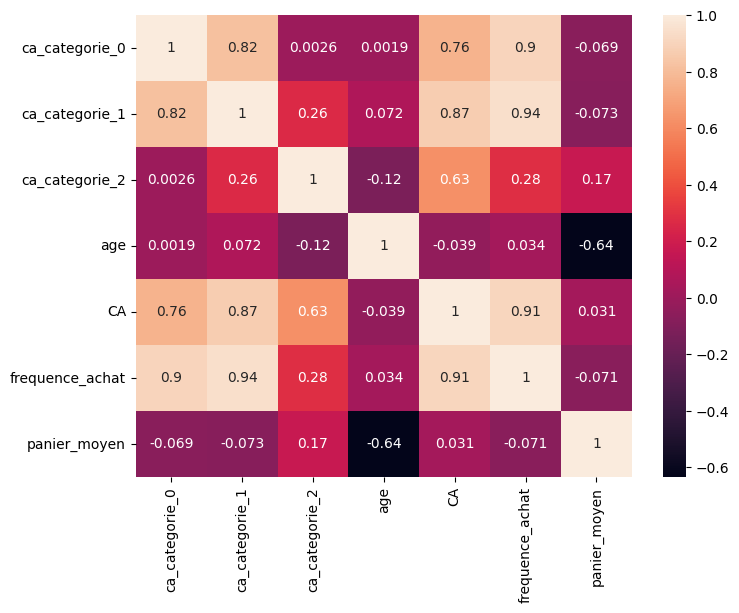

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True)
plt.show()

C'est l'heure de madame la Recence :):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):):)

In [34]:
pOUR_lA_rECENCE

,id_prod,date,session_id,client_id,mois
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,April
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,February
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,September
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,October
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,July
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,May
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,June
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,March
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,October


In [35]:
pOUR_lA_rECENCE["date"] = pd.to_datetime(pOUR_lA_rECENCE["date"], format='%Y-%m-%d')
pOUR_lA_rECENCE["date"] = pOUR_lA_rECENCE["date"].dt.date
pOUR_lA_rECENCE

/tmp/ipykernel_284491/3253689554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pOUR_lA_rECENCE["date"] = pd.to_datetime(pOUR_lA_rECENCE["date"], format='%Y-%m-%d')
/tmp/ipykernel_284491/3253689554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pOUR_lA_rECENCE["date"] = pOUR_lA_rECENCE["date"].dt.date


,id_prod,date,session_id,client_id,mois
0,0_1483,2021-04-10,s_18746,c_4450,April
1,2_226,2022-02-03,s_159142,c_277,February
2,1_374,2021-09-23,s_94290,c_4270,September
3,0_2186,2021-10-17,s_105936,c_4597,October
4,0_1351,2021-07-17,s_63642,c_1242,July
...,...,...,...,...,...
337011,1_671,2021-05-28,s_40720,c_3454,May
337012,0_759,2021-06-19,s_50568,c_6268,June
337013,0_1256,2021-03-16,s_7219,c_4137,March
337014,2_227,2021-10-30,s_112349,c_5,October


In [36]:
date_actuelle = pd.Timestamp('2024-03-18')
pOUR_lA_rECENCE['date'] = pd.to_datetime(pOUR_lA_rECENCE['date'])
derniere_date_par_client = pOUR_lA_rECENCE.groupby('client_id')['date'].max().reset_index()
derniere_date_par_client['recence'] = date_actuelle - derniere_date_par_client['date']
derniere_date_par_client


/tmp/ipykernel_284491/2485620326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pOUR_lA_rECENCE['date'] = pd.to_datetime(pOUR_lA_rECENCE['date'])


,client_id,date,recence
0,c_1,2022-02-01,776 days
1,c_10,2021-12-14,825 days
2,c_100,2021-08-10,951 days
3,c_1000,2022-02-28,749 days
4,c_1001,2022-02-26,751 days
...,...,...,...
8595,c_995,2021-11-04,865 days
8596,c_996,2022-02-06,771 days
8597,c_997,2022-01-05,803 days
8598,c_998,2022-02-23,754 days


In [38]:
pOUR_lA_rECENCE_fInal = derniere_date_par_client.drop(["date"], axis=1)
pOUR_lA_rECENCE_fInal

,client_id,recence
0,c_1,776 days
1,c_10,825 days
2,c_100,951 days
3,c_1000,749 days
4,c_1001,751 days
...,...,...
8595,c_995,865 days
8596,c_996,771 days
8597,c_997,803 days
8598,c_998,754 days


In [39]:
final_df = pd.merge(left=final_df, right=pOUR_lA_rECENCE_fInal, on="client_id")
final_df

,client_id,ca_categorie_0,ca_categorie_1,ca_categorie_2,sex,age,CA,frequence_achat,panier_moyen,recence
0,c_1,174.20,71.58,54.87,m,69,300.65,15,20.043333,776 days
1,c_10,124.92,391.27,69.99,m,68,586.18,16,36.636250,825 days
2,c_100,31.38,52.96,138.53,m,32,222.87,3,74.290000,951 days
3,c_1000,169.85,810.17,0.00,f,58,980.02,42,23.333810,749 days
4,c_1001,527.81,274.64,300.00,m,42,1102.45,24,45.935417,751 days
...,...,...,...,...,...,...,...,...,...,...
8595,c_995,55.34,63.74,0.00,m,69,119.08,5,23.816000,865 days
8596,c_996,204.70,534.90,0.00,f,54,739.60,36,20.544444,771 days
8597,c_997,84.86,158.92,329.11,f,30,572.89,10,57.289000,803 days
8598,c_998,88.17,108.06,1331.46,m,23,1527.69,13,117.514615,754 days
